# Lecture-07 Transmission and Reflection
* author : Wei-Kai Lee
* Data : 2020/02/22

[wiki(chinese)](https://zh.wikipedia.org/wiki/%E5%9D%A1%E5%8D%B0%E4%BA%AD%E5%AE%9A%E7%90%86) [wiki(English)](https://en.wikipedia.org/wiki/Poynting%27s_theorem)

In [1]:
# python module
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import collections

In [2]:
# optics module
from optics.TransferMatrix import cal_r_tau_from_structure, cal_field_z, plot_fun, cal_field_z_2, VectorNamedTuple, Floating
from optics.PlaneWave import cal_s, cal_p

In the previous lecture, we showed you how to calculate the transmission coefficients and the reflection coefficients of a layered structure. In this section we would like to calculate the power transmission and the reflection of a layered structute. 

In order to calculate the transmission and the reflection (power) of a layered strcuture, we need to discuss [Poynting Theorem](https://en.wikipedia.org/wiki/Poynting%27s_theorem) first for EM wave power of a plane wave through a plane.

## Poynting Theorem

In this block, we'll show you how to prove the **Poynting Theorem** in frequency domain from Maxwell's equations.

From two curl equations in Maxwell's equations in frequency domain

<font size="4">$$\nabla\times\textbf{E}= i\omega\mu_0\mu_r\textbf{H} - (1)$$</font>
<font size="4">$$\nabla\times\textbf{H}= \textbf{J}_f-i\omega\epsilon_0\epsilon_r\textbf{E} - (2)$$</font>

Take **Eq. (2)** complex conjugate

<font size="4">$$(\nabla\times\textbf{H})^*= (\textbf{J}_f-i\omega\textbf{D})^* - (3)$$</font>
<font size="4">$$\nabla\times\textbf{H}^*= \textbf{J}_f^*+i\omega\textbf{D}^* - (4)$$</font>

$\textbf{H}^*\cdot$**Eq. (1)** and $\textbf{E}\cdot$**Eq. (4)**

<font size="4">$$\textbf{H}^*\cdot(\nabla\times\textbf{E}) = i\omega\textbf{B}^*\cdot\textbf{H} - (5)$$</font>
<font size="4">$$\textbf{E}\cdot(\nabla\times\textbf{H}^*) = \textbf{E}\cdot\textbf{J}_f^*+i\omega\textbf{E}\cdot\textbf{D}^* - (6)$$</font>

Then **Eq. (5)** - **Eq. (6)**

<font size="4">$$\textbf{H}^*\cdot(\nabla\times\textbf{E}) - \textbf{E}\cdot(\nabla\times\textbf{H}^*) = i\omega\textbf{B}^*\cdot\textbf{H} - \textbf{E}\cdot\textbf{J}_f^* - i\omega\textbf{E}\cdot\textbf{D}^* - (7)$$</font>

With [vector identity](https://en.wikipedia.org/wiki/Vector_calculus_identities) ($\nabla\cdot(\textbf{A}\times\textbf{B}) = \ (\nabla\times\textbf{A})\cdot\textbf{B}-\textbf{A}\cdot(\nabla\times\textbf{B})$). Then **Eq. (7)** become:

<font size="4">$$\nabla\cdot(\textbf{E}\times\textbf{H}^*) =  - \textbf{E}\cdot\textbf{J}_f^* + i\omega\textbf{B}^*\cdot\textbf{H} - i\omega\textbf{E}\cdot\textbf{D}^* - (8)$$</font>

With the definition of Poynting Vector $\textbf{S} = \textbf{E}\times\textbf{H}^*$ (don't forget the time average of Poynting vector is $Re(\textbf{S})$ (real part) )

<font size="4">$$\nabla\cdot\textbf{S} =  - \textbf{E}\cdot\textbf{J}_f^* + i\omega(\textbf{B}^*\cdot\textbf{H} - \textbf{E}\cdot\textbf{D}^*) - (9)$$</font>

**Eq. (9)** is the differential form of Poynting Theorem.

Besides, with divergence theorem

<font size="4">$$\oint\textbf{S}\cdot d\textbf{A} = \int(\nabla\cdot\textbf{S})dV =  -\int(\textbf{E}\cdot\textbf{J}_f^*)dV + i\omega\int(\textbf{B}^*\cdot\textbf{H} - \textbf{E}\cdot\textbf{D}^*)dV - (10)$$</font>

**Eq. (10)** corresponds the integral form of Poyniting Theorem.

Although the derivations from **Eq. (1)** to **Eq. (10)** are tedios, **Eq. (9)** and **Eq. (10)** are important in electromagnetics.

In this block, we are going to state the physical meaning of **Eq. (9)** and **Eq. (10)**. 

The 1st term in the right hand side is the power generated or absorbed by the current source. This term would be very interesting and we are going to further elaborate this term in the future section. Now we only discuss the source free region and as a result, this term would be zero.

The 2nd term in the right hand side would correspond to the energy store in the electric field and the magnetic field in the space. 

Follow this definition, **Eq. (10)** states that for a volume, V, enclosed by a surface, A, the difference of the power generated/absorbed by the currect source in V (RHS 1st term) and the energy stored in the electric field and the magnetic field (RHS 2nd term) would be the power flow outward or inward A. Hence, the the left hand side of **Eq. (10)** corresponds to the power carried by the EM wave going outward/inward a closed surface. As a result, Poynting vector $\textbf{S}$ would directly relates to the power carried by EM wave.


In [3]:
def PoyntingVector(E, H):
    # E : electric field (type : VectorNamedTuple)
    # H : magnetic field (type : VectorNamedTuple)
    
    Sx = E.vy * H.vz.conj() - E.vz * H.vy.conj()
    Sy = E.vz * H.vx.conj() - E.vx * H.vz.conj()
    Sz = E.vx * H.vy.conj() - E.vy * H.vx.conj()
    return VectorNamedTuple( Sx, Sy, Sz )

# Poynting Vector of Plane Wave

For a plane wave (no surface current and surface charge accumulation), 

<font size = "4">$$\textbf{E} = \textbf{E}_0 exp(i(\textbf{k}\cdot\textbf{r}-\omega t)) - (11)$$</font>
<font size = "4">$$\textbf{H} = \textbf{H}_0 exp(i(\textbf{k}\cdot\textbf{r}-\omega t)) - (12)$$</font>

From **Eq. (1)**

<font size = "4">$$\textbf{H}_0 = \frac{1}{\omega\mu_0\mu_r}\textbf{k}\times\textbf{E}_0 - (13)$$</font>

Then the Poynting vector of a plane wave would become, 

<font size = "4">$$\textbf{S} = \textbf{E}\times\textbf{H}^* = \textbf{E}_0\times(\frac{1}{\omega\mu_0\mu_r}\textbf{k}^*\times\textbf{E}_0^*) =  \frac{1}{\omega\mu_0\mu_r}( (\textbf{E}_0\cdot\textbf{E}_0^*)\textbf{k}^* - (\textbf{E}_0\cdot\textbf{k}^*)\textbf{E}_0^*) - (14)$$</font>

Although **Eq. (14)** might be a little different from what you have learned in general physics, this is more general form of the Poynting vector of the plane wave. 

If $\textbf{k}$ is a real number vector, showing that the field would not be exponential decay in any direction. From the divergence equation in Maxwell's equation, $\textbf{k}$ is normal to $\textbf{E}_0$. Then 

<font size = "4">$$\textbf{S} = \textbf{E}\times\textbf{H}^* =  \frac{1}{\omega\mu_0\mu_r} (\textbf{E}_0\cdot\textbf{E}_0^*)\textbf{k} - (15)$$</font>

**Eq. (15)** shows that the Poynting vector, $\textbf{S}$, is along the same direction of the wave vector, $\textbf{k}$. And the magnitude of $\textbf{S}$ would be propotional to the square of the field value.

<font size = "4">$$S = |\textbf{S}| =  \frac{k}{\omega\mu_0\mu_r} (E_0^2) = \frac{\sqrt{\epsilon_0\epsilon_r}}{\sqrt{\mu_0\mu_r}} E_0^2 - (16)$$</font>

**Eq. (16)** shows that a the power of a ray is directly proportional to the square of the electric field magnitude.



Now, there is a question, when will $\textbf{k}$ be a real number vector??
As we learned in the previous lecture, $k = \sqrt{k_x^2+k_y^2+k_z^2}= nk_o = n\omega/c = \omega\sqrt{\epsilon_0\epsilon_r\mu_0\mu_r}$ There might be two situations such that $\textbf{k}$ is **not** a real number vector.
First, when the material is lossy (i.e. the permittiviy or the permeability is a complex number), $k$ would become also a complex number, showing that the energy would be absorbed by the material.

The second one is about the evanescent wave. Although it is not so intuitive, even when the permittivity and the permeability are real value, as the square sum of any two wave vector components is larger than the wave number(e.g. $kx^2 + ky^2 > (nk_o)^2$ ), the other wave component would become a pure imaginary value (i.e. $k_z = i\kappa_z$). Then the plane would become


<font size = "4">$$F = F_0 exp(i(k_xx+k_yy+i\kappa_z z-\omega t)) - (17)$$</font>
<font size = "4">$$F = F_0 exp(-\kappa_z z)exp(i(k_xx+k_yy-\omega t)) - (18)$$</font>

**Eq. (18)** shows that the field value would decay along z axis. Besides, interestingly, **Eq. (18)** do not indicate that the power would be absorded by the material along z-axis because the material is lossless (real value). The power per unit area flows over -axis would be $Re(S_z)$. From **Eq. (14)**

<font size = "4">$$Re(S_z) = Re(\frac{1}{\omega\mu_0\mu_r}( (\textbf{E}_0\cdot\textbf{E}_0^*)k_z^* - (\textbf{E}_0\cdot\textbf{k}^*)E_{0,z}^*))  - (19)$$</font>

and $\textbf{E}_0\cdot\textbf{k}^* = \textbf{E}_0\cdot\textbf{k} - 2iE_{0,z}\kappa_z = - 2iE_{0,z}\kappa_z $ **Eq. (19)** would become 

<font size = "4">$$Re(S_z) = Re(\frac{1}{\omega\mu_0\mu_r}( -i(\textbf{E}_0\cdot\textbf{E}_0^*)\kappa_z + 2iE_{0,z}E_{0,z}^*\kappa_z)) = 0  - (20)$$</font>

**Eq. (20)** clearly shows that for the lossless material, the field value decays along the z-axis but the wave in not propagating along the z-axis. Besides, as the derivation, because the wave is not propagating along z-axis, the power of the evancescent wave would become zero and would not carry any power along the decay direction.

# Transmission and Reflection 
<img src="Lecture-7-Material/Fig-1.jpg" width= "400">
$$Fig. 1.$$

In this section, we are going to calculate the transmission and the reflection of a planar structure. The power flowing over a plane would not equal to the magnitude of the Poynting vector. The power per unit area flowing over the plane would be $S_z = \textbf{S}\cdot\hat{\textbf{z}}$ as in **Fig. 1**, which is similar to the LHS of **Eq. (10)**.

<img src="Lecture-7-Material/Fig-2.jpg" width= "400">
$$Fig. 2.$$

For a stacking layered structure as shown in **Fig. 2**, the incident material is **material 0** and the light out-going material is **material m**. In material m, there is only one plane wave propagating toward +z direction. Hence, as in the last section, 

<font size = "4">$$S_{z,m} = (\textbf{E}_m\times\textbf{H}_m^*)|_z = \frac{1}{\omega\mu_0\mu_{r,m}}( (\textbf{E}_m^+\cdot\textbf{E}_m^{+,*})k_{z,m}^{+,*} - (\textbf{E}_m^+\cdot\textbf{k}_m^{+,*})E_{z,m}^{+,*}) - (21)$$</font>

In **material 0**, it would be a little complicated because in this region the EM wave is composed by two different plane (+z and -z) and it should be noticed that the electric field and the magnetic field in the Poynting theorem are the total field but not a single plane wave. Hence, the Poynting vector in **material 0** is

<font size = "4">$$\textbf{S}_0 = \textbf{E}_0\times\textbf{H}_0^* = (\textbf{E}_0^+ + \textbf{E}_0^-)\times( \textbf{H}_0^+ + \textbf{H}_0^- )^* = \textbf{E}_0^+\times\textbf{H}_0^{+,*} + \textbf{E}_0^-\times\textbf{H}_0^{-,*} + \textbf{E}_0^+\times\textbf{H}_0^{-,*} + \textbf{E}_0^-\times\textbf{H}_0^{+,*}- (22)$$</font>

and we can define

<font size = "4">$$\textbf{S}_0^+ = \textbf{E}_0^+\times\textbf{H}_0^{+,*} - (23)$$</font>
<font size = "4">$$\textbf{S}_0^- = \textbf{E}_0^-\times\textbf{H}_0^{-,*} - (24)$$</font>

**Eq. (22)** can be rewrited as

<font size = "4">$$\textbf{S}_0 = \textbf{S}_0^+ + \textbf{S}_0^- + \textbf{E}_0^+\times\textbf{H}_0^{-,*} + \textbf{E}_0^-\times\textbf{H}_0^{+,*}- (25)$$</font>

**Eq. (25)** indicates that the total Poynting vector $\textbf{S}_0$ would not directly equal to the sum of the Poynting vector +z and -z ($\textbf{S}_0^+$ and $\textbf{S}_0^-$). There are two additional cross-over terms between the +z and -z wave.

From **Eq. (25)**, there would be a big problem for us to calculate the transmission and the reflection when the power cannot be separated by only the incident wave and the reflected wave.

Now we are going to analyze **Eq. (25)** in more detail. For the cross-over term

<font size = "4">$$\textbf{E}_0^+\times\textbf{H}_0^{-,*} = \textbf{E}_0^+\times(\frac{1}{\omega\mu_0\mu_{r,0}}\textbf{k}_0^-\times\textbf{E}_0^- )^* =  \frac{1}{\omega\mu_0\mu_{r,0}}( (\textbf{E}_0^+\cdot\textbf{E}_0^{-,*})\textbf{k}_0^{-,*} - (\textbf{E}_0^+\cdot\textbf{k}_0^{-,*})\textbf{E}_0^{-,*}) - (26)$$</font>

And the time average power over the plane (z component) can be calculated as 

<font size = "4">$$Re(\textbf{E}_0^+\times\textbf{H}_0^{-,*}|_z) = Re(\frac{1}{\omega\mu_0\mu_{r,0}}( (\textbf{E}_0^+\cdot\textbf{E}_0^{-,*})k_{z,0}^{-,*} - (\textbf{E}_0^+\cdot\textbf{k}_0^{-,*})E_{0,z}^{-,*}))  - (27)$$</font>

, which is similar to **Eq. (19)**. Similary, the other cross over term would become

<font size = "4">$$Re(\textbf{E}_0^-\times\textbf{H}_0^{+,*}|_z) = Re(\frac{1}{\omega\mu_0\mu_{r,0}}( (\textbf{E}_0^-\cdot\textbf{E}_0^{+,*})k_{z,0}^{+,*} - (\textbf{E}_0^-\cdot\textbf{k}_0^{+,*})E_{0,z}^{+,*}))  - (28)$$</font>

When this two terms sum together, there would be two important terms as 

<font size = "4">$$
(\textbf{E}_0^+\cdot\textbf{E}_0^{-,*})k_{z,0}^{-,*} + 
(\textbf{E}_0^-\cdot\textbf{E}_0^{+,*})k_{z,0}^{+,*}  = (\textbf{E}_0^+\cdot\textbf{E}_0^{-,*} - (\textbf{E}_0^+\cdot\textbf{E}_0^{-,*})^*)k_{z,0}^{-,*} = 2ik_{z,0}^{-,*}\times Imag(\textbf{E}_0^+\cdot\textbf{E}_0^{-,*})- (29)$$</font>
<font size = "4">$$
(\textbf{E}_0^+\cdot\textbf{k}_0^{-,*})E_{0,z}^{-,*} + (\textbf{E}_0^-\cdot\textbf{k}_0^{+,*})E_{0,z}^{+,*} - (30)$$</font>

Don't forget $k_{z,0}^- = -k_{z,0}^+$ 
Similar to the previous block if $\textbf{k}_0^+$ and $\textbf{k}_0^-$ are real vectors.

<font size = "4">$$ \textbf{Eq. (29)} = 2ik_{z,0}^-\times Imag(\textbf{E}_0^+\cdot\textbf{E}_0^{-,*}) - (31)$$</font>

and 

<font size = "4">$$ \textbf{Eq. (30)} = (\textbf{E}_0^+\cdot\textbf{k}_0^-)E_{0,z}^{-,*} + (\textbf{E}_0^-\cdot\textbf{k}_0^+)E_{0,z}^{+,*} - (32) $$</font>

As **Lecture 6-1**, for the z component of the TE mode is zero. As a result, **Eq. (32)** is also zerosfor TE mode. Besides with the definition of $\hat{\textbf{p}}_{\pm}$, then 

<font size = "4">$$ \textbf{Eq. (30)} = (-\frac{k_z^+k_x}{kk_t}k_x - \frac{k_z^+k_y}{kk_t}k_y - \frac{k_t}{k}k_z^+ )\frac{k_t}{k}E_0^+E_0^{-,*} + (\frac{k_z^+k_x}{kk_t}k_x + \frac{k_z^+k_y}{kk_t}k_y + \frac{k_t}{k}k_z^+ )\frac{k_t}{k}E_0^-E_0^{+,*} $$</font>
<font size = "4">$$ = -(\frac{k_z^+k_x}{k^2}k_x + \frac{k_z^+k_y}{k^2}k_y + \frac{k_t^2}{k^2}k_z^+ )E_0^+E_0^{-,*} + (\frac{k_z^+k_x}{k^2}k_x + \frac{k_z^+k_y}{k^2}k_y + \frac{k_t^2}{k^2}k_z^+ )E_0^-E_0^{+,*} $$</font>
<font size = "4">$$ = (\frac{k_z^+k_x}{k^2}k_x + \frac{k_z^+k_y}{k^2}k_y + \frac{k_t^2}{k^2}k_z^+ )( -E_0^+E_0^{-,*} + E_0^-E_0^{+,*}) $$</font>
<font size = "4">$$ = (\frac{k_z^+k_x}{k^2}k_x + \frac{k_z^+k_y}{k^2}k_y + \frac{k_t^2}{k^2}k_z^+ )\times 2iImag( E_0^-E_0^{+,*}) - (33)$$</font>

Insert **Eq. (31)** and **Eq. (33)** into **Eq. (27)** and **Eq. (28)**. Because **Eq. (31)** and **Eq. (33)** are pure imaginary value and if the material is lossless (i.e. $\mu_{r,0}$ is a real number), **Eq. (27)** and **Eq. (28)** are both zeros, indiacating the cross-over term in **Eq. (25)** disappear. Then

<font size = "4">$$\textbf{S}_0 = \textbf{S}_0^+ + \textbf{S}_0^- (34)$$</font>

Hence, **only when the wave vector of the incident, and the reflected  wave are real vectors (non evanescent wave) and the material is lossless, then the power over a plane can be perfectly separated into the power toward +z and toward -z**. 

The results of the derivations above are not only valid for the incident material but also valid for the other layers because as in the previous lecture, the total field would also be composed by the wave +z and -z. The derivations can be easily get by changing the subscript from 0 to the layer index.

=========================================================================================================================
Then you would ask, what's going on about the lossless material but with evanescent wave. 

In general, the total field of the evanescent wave in a material would be composed by two evanescent wave toward +z and -z. (similar to **Eq. (18)**)

<font size = "4">$$F = F_0^+ exp(-\kappa_z z)exp(i(k_xx+k_yy)) + F_0^- exp(+\kappa_z z)exp(i(k_xx+k_yy)) - (35)$$</font>

As **Eq. (20)**, $\textbf{S}_0^+$ and $\textbf{S}_0^-$ are both zeros. Hence, you might ask there would not be any power flow toward z direction in this material. However, this is wrong. You might heard that the EM wave can also tunnel to a material by the evanescent wave. If the wave cannot carries the power, how can the wave tunnel a material. Evidently, from **Eq. (25)**, the power is carried by the cross-over term and it cannot be attributed to one of the +z and -z wave.

=========================================================================================================================

On the other hand, from **Eq. (25)**, the power carried by the EM wave in lossy materials would also be carried by the +z and -z wave as in the evanescent wave. Hence, in this kinde of material, it is also meaningless to define the ratio between the +z power and the -z power.

=========================================================================================================================

From **Eq. (21)** and **Eq. (34)** with **Eq. (15)**, we finally can defined the transmission and the reflection.

<font size = "4">$$T = \frac{Re(S_{z,m}^+)}{Re(S_{z,0}^+)} = Re(\frac{(\textbf{E}_m^+\cdot\textbf{E}_m^{+,*})k_{z,m}^+/\mu_{r,m}}{(\textbf{E}_0^+\cdot\textbf{E}_0^{+,*})k_{z,0}^+/\mu_{r,0}}) - (36)$$</font>
<font size = "4">$$R = \frac{Re(S_{z,0}^-)}{Re(S_{z,0}^+)} = Re(-\frac{(\textbf{E}_0^-\cdot\textbf{E}_0^{-,*})k_{z,0}^-/\mu_{r,m}}{(\textbf{E}_0^+\cdot\textbf{E}_0^{+,*})k_{z,0}^+/\mu_{r,0}}) - (37)$$</font>

With the definition of the reflection coefficient, $\gamma$, and the transmission coefficient, $\tau$, defined in **Lecture 6-3**, then


<font size = "4">$$T = \frac{Re(S_{z,m}^+)}{Re(S_{z,0}^+)} = Re(\frac{k_{z,m}^+/\mu_{r,m}}{k_{z,0}^+/\mu_{r,0}}\tau\tau^*) - (36)$$</font>
<font size = "4">$$R = \frac{Re(S_{z,0}^-)}{Re(S_{z,0}^+)} = Re(\gamma \gamma^*) - (37)$$</font>

In [5]:
def cal_TRA( tau, r, kzm, kz0, murm=1.0, mur0=1.0):
    mask = (kz0!=0)
    T = np.zeros( tau.shape, dtype=np.float64 )
    T[mask] = np.real(  ( kzm[mask]/kz0[mask] ) * (mur0/murm) * tau[mask]*tau[mask].conj() )
    R = np.real( r*r.conj() )
    A = 1 - T - R
    return T, R, A

Although the code/equation seems very simple, the physics behind the equations are difficult. 

In **cal_TRA**, because R and T are real values not complex number, we use **np.real()** to confirm R and T are real number (remove floating issue in the imaginary part).

In [6]:
n1, n2 = 1.5, 1.0
theta1 = np.linspace(0, np.pi/2 , 100)
wavelength = 520
e0, mu0 = 1.0, 1.0

c = 1/np.sqrt(e0*mu0)
ko = 2*np.pi/wavelength
w = c * ko
k1, k2 = n1*ko, n2*ko

kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )

# calculate r and tau
thickness_list = [0, 0]
er_list = [n1**2, n2**2] 
tau_s_E, r_s_E, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H, r_p_H, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

# 
kz0, kzm = kz_list[0], kz_list[-1]
Ts, Rs, As = cal_TRA( tau_s_E, r_s_E, kzm, kz0)
Tp, Rp, Ap = cal_TRA( tau_p_H, r_p_H, kzm, kz0)

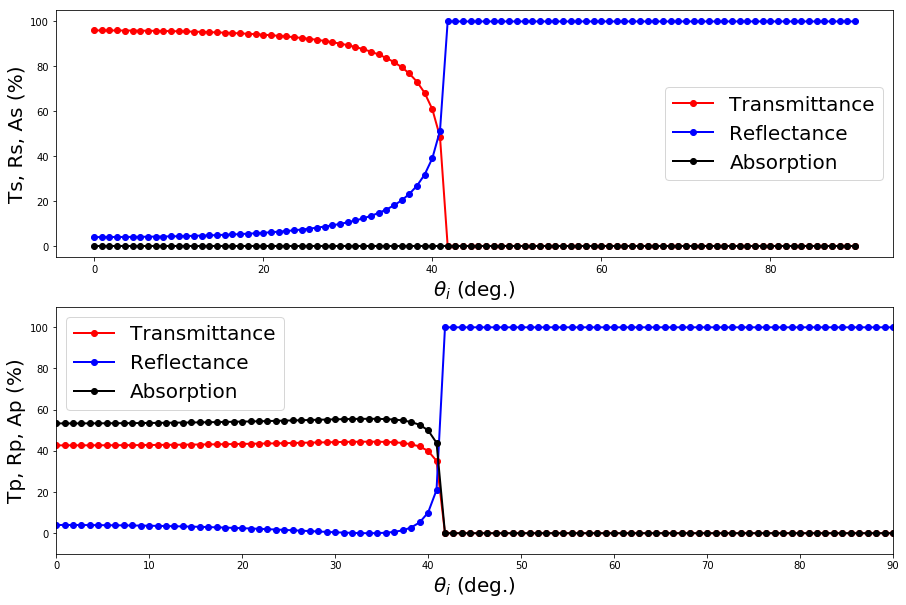

In [8]:
## plot data
fig, axes = plt.subplots(2,1)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0].plot( theta1*180/np.pi, Ts * 100, 'ro-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, Rs * 100, 'bo-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, As * 100, 'ko-', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'Ts, Rs, As (%)', fontsize=20)
axes[0].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -10, 110);

axes[1].plot( theta1*180/np.pi, Tp * 100, 'ro-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Rp * 100, 'bo-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Ap * 100, 'ko-', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'Tp, Rp, Ap (%)', fontsize=20)
axes[1].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -10, 110);

**Oh no!!!!!!** It seems something wrong!!!!! Although the material is lossless, Ap is still not zero when $\theta_i<\theta_c$

Now we need to calm down to carefully analyze where is the bug!!!!
For TE mode, it seems quite right, right? As is zeros for all $\theta$, none of Ts, Rs, As is out of the range of 0% and 100%, and Ts is zero when $\theta>\theta_c$.

As a result, the bug would be in the difference between TE mode and TM mode. However, in **cal_TRA**, it does not depend on the TE mode and the TM mode. Therefore, the issue would be in the input.

In **Eq. (36)** and **Eq. (37)**, $\gamma$ and $\tau$ we used are defined by the electric field but $\gamma$ and $\tau$ calculated by **cal_r_tau_from_structure** for TM mode is defined by the magnetic field. Yeah, that's the bug and we need to fix it.

As in **Lecture 5-2**,

<font size="4">$$\gamma_{p,E} = \frac{E_{1,-}}{E_{1,+}} = \frac{H_{y,1,-}}{H_{y,1,+}} = \gamma_{p,H} - (38)$$</font>
<font size="4">$$\tau_{p,E} = \frac{E_{2,+}}{E_{1,+}} = \frac{n_1H_{y,2,+}}{n_2H_{y,1,+}} = \frac{n_1}{n_2}\tau_{p,H}  - (39)$$</font>

Here $n_1$ is the refractive index of the incident material and $n_2$ is the transmitted material.

In [9]:
r_p_E = r_p_H
tau_p_E = (n1/n2)*tau_p_H
Tp, Rp, Ap = cal_TRA( tau_p_E, r_p_E, kzm, kz0)

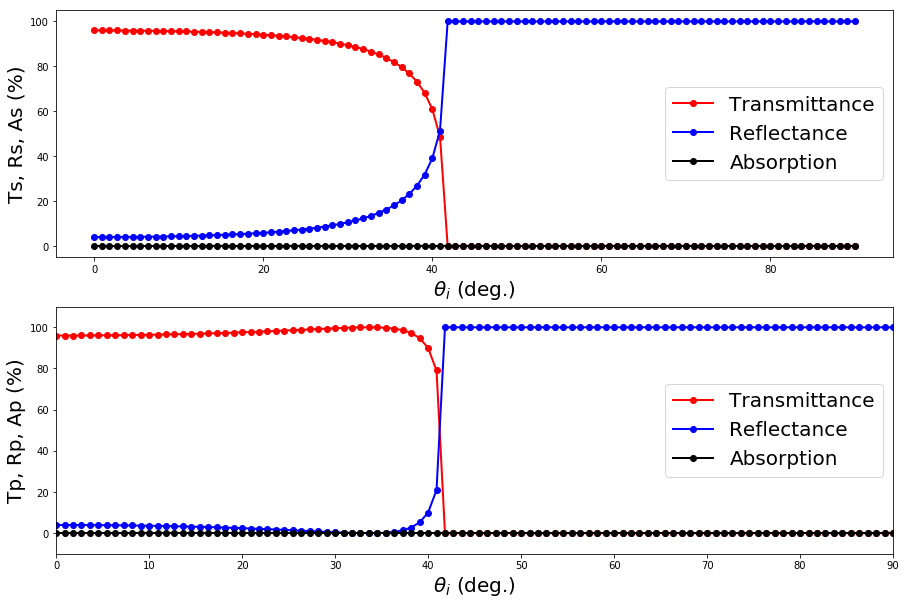

In [10]:
## plot data
fig, axes = plt.subplots(2,1)

axes[0].plot( theta1*180/np.pi, Ts * 100, 'ro-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, Rs * 100, 'bo-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, As * 100, 'ko-', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'Ts, Rs, As (%)', fontsize=20)
axes[0].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -10, 110);

axes[1].plot( theta1*180/np.pi, Tp * 100, 'ro-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Rp * 100, 'bo-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Ap * 100, 'ko-', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'Tp, Rp, Ap (%)', fontsize=20)
axes[1].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -10, 110);

That's right. The simulation is perfect. In TM mode, we can see that the transmittance = 100% and the reflectance = 0% at the Brewster angle. And the reflectance of both the TE mode and the TM mode are 100% when $\theta>\theta_c$.

In [11]:
n1, n2 = 1.0, 1.5
theta1 = np.linspace(0, np.pi/2 , 100)
wavelength = 520
e0, mu0 = 1.0, 1.0

c = 1/np.sqrt(e0*mu0)
ko = 2*np.pi/wavelength
w = c * ko
k1, k2 = n1*ko, n2*ko

kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )

# calculate r and tau
thickness_list = [0, 0]
er_list = [n1**2, n2**2] 
tau_s_E, r_s_E, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H, r_p_H, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')
r_p_E = r_p_H
tau_p_E = (n1/n2)*tau_p_H

# 
kz0, kzm = kz_list[0], kz_list[-1]
Ts, Rs, As = cal_TRA( tau_s_E, r_s_E, kzm, kz0)
Tp, Rp, Ap = cal_TRA( tau_p_E, r_p_E, kzm, kz0)


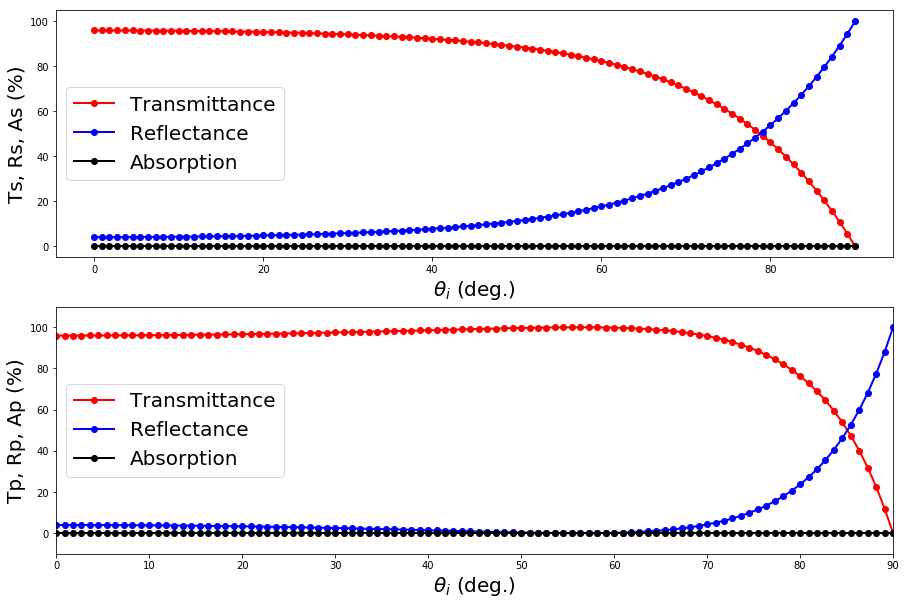

In [12]:
## plot data
fig, axes = plt.subplots(2,1)

axes[0].plot( theta1*180/np.pi, Ts * 100, 'ro-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, Rs * 100, 'bo-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, As * 100, 'ko-', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'Ts, Rs, As (%)', fontsize=20)
axes[0].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -10, 110);

axes[1].plot( theta1*180/np.pi, Tp * 100, 'ro-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Rp * 100, 'bo-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Ap * 100, 'ko-', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'Tp, Rp, Ap (%)', fontsize=20)
axes[1].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -10, 110);

Here, we can wrap **cal_r_tau_from_structure** and **cal_TRA** together

In [13]:
def cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mur_list = None, mode = 'TE'):
    # kx    : x component of wave vector
    # ky    : y component of wave vector
    # thickness_list : the thicknesses of the material, thickness_list.size is the number of the materials, 
    #                  and thickness_list[0] is the incident material
    # ko : wave number in vacuum
    # er_list : a list of relative permittivity
    # mur_list : a list of relative permeability (if mur_list == None, the default value = 1.0)
    # mode : mode type (TE or TM)
    
    # input process
    er_list = np.array( er_list, dtype = np.complex )
    mur_list = np.ones( er_list.shape, dtype=er_list.dtype) if (mur_list is None) else np.array( mur_list, dtype = np.complex )

    # check mode
    if mode.upper() != 'TE' and mode.upper() != 'TM':
        print('ERROR mode : {0}'.format(mode) )
        assert False
        
    # calculate r, tau
    if mode.upper() == 'TE':
        tau_E, r_E, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mur_list = mur_list, mode='TE')
    elif mode.upper() == 'TM':
        tau_H, r_H, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mur_list = mur_list, mode='TM')
        r_E = r_H
        tau_E = np.sqrt(er_list[0]/er_list[-1])*tau_H
    
    # calculate T, R, A
    T, R, A = cal_TRA( tau_E, r_E, kz_list[-1], kz_list[0], murm=mur_list[-1], mur0=mur_list[0])
    
    return T, R, A

In [14]:
n1, n2 = 1.0, 1.5
theta1 = np.linspace(0, np.pi/2 , 100)
wavelength = 520
e0, mu0 = 1.0, 1.0

c = 1/np.sqrt(e0*mu0)
ko = 2*np.pi/wavelength
w = c * ko
k1, k2 = n1*ko, n2*ko

kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )

# calculate r and tau
thickness_list = [0, 0]
er_list = [n1**2, n2**2] 
Ts, Rs, As = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
Tp, Rp, Ap = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

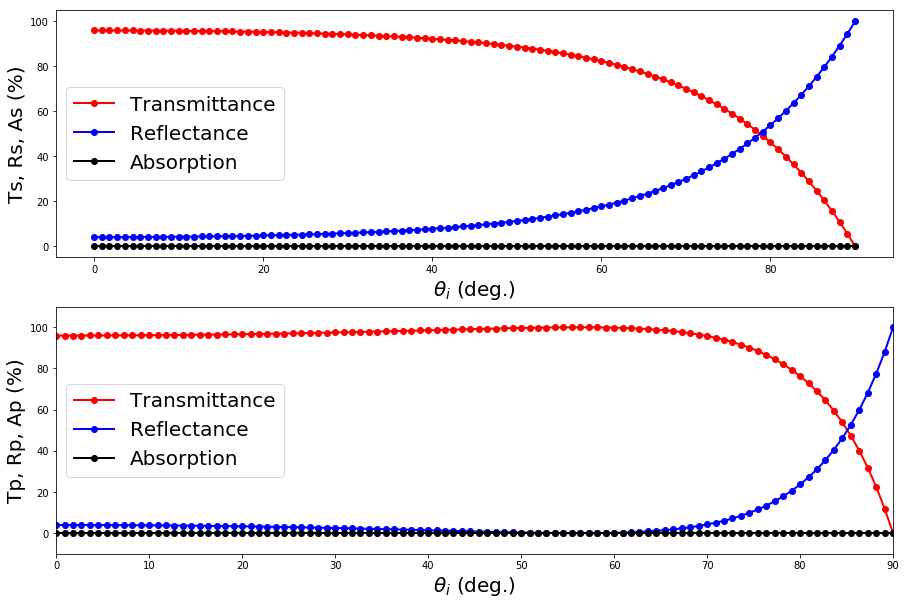

In [15]:
## plot data
fig, axes = plt.subplots(2,1)

axes[0].plot( theta1*180/np.pi, Ts * 100, 'ro-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, Rs * 100, 'bo-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, As * 100, 'ko-', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'Ts, Rs, As (%)', fontsize=20)
axes[0].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -10, 110);

axes[1].plot( theta1*180/np.pi, Tp * 100, 'ro-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Rp * 100, 'bo-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Ap * 100, 'ko-', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'Tp, Rp, Ap (%)', fontsize=20)
axes[1].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -10, 110);

And we wrapped the function develop in this lecture in module **RTA.py**.